# Clustering K_means


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [10]:
# for k-Means
X = dataset.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.cluster import KMeans
# figuring out how many cluster i shoudl choose
wcss = []
for i in range( 1, 11 ):
    kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 10 )
    kmeans.fit( X )
    wcss.append( kmeans.inertia_ )
wcss

[269981.28000000014,
 182440.30762987016,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30273.394312070028,
 25007.38394731206,
 21826.936303231643,
 19669.71099830122]

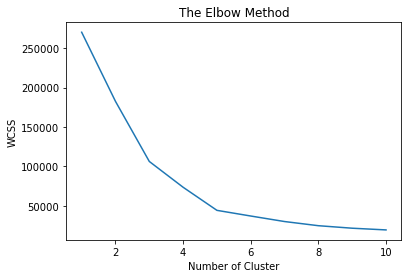

In [15]:
plt.plot( range( 1, 11 ), wcss )
plt.title( 'The Elbow Method' )
plt.xlabel( 'Number of Cluster' )
plt.ylabel( 'WCSS' )
plt.show()

!!! **znaczący spadek nachylenia jest około 5 <- wybieramy 5.** !!!

In [17]:
kmeans = KMeans( n_clusters = 5, init = 'k-means++', random_state = 10 )

In [18]:
y = kmeans.fit_predict(X)

In [19]:
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

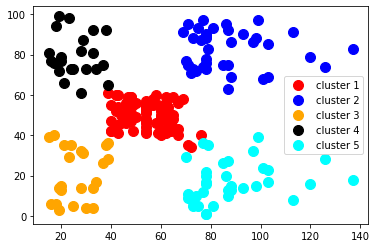

In [24]:
plt.scatter( X[y == 0,0 ], X[y == 0,1], s = 100, c = 'red', label = 'cluster 1' )
plt.scatter( X[y == 1,0 ], X[y == 1,1], s = 100, c = 'blue', label = 'cluster 2' )
plt.scatter( X[y == 2,0 ], X[y == 2,1], s = 100, c = 'orange', label = 'cluster 3' )
plt.scatter( X[y == 3,0 ], X[y == 3,1], s = 100, c = 'black', label = 'cluster 4' )
plt.scatter( X[y == 4,0 ], X[y == 4,1], s = 100, c = 'cyan', label = 'cluster 5' )
plt.legend()
# s - resolution in terms of number of points

# The same stuff but for 3 parameters

In [25]:
# for k-Means
X = dataset.iloc[:,[2,3,4]].values
from sklearn.cluster import KMeans
# figuring out how many cluster i shoudl choose
wcss = []
for i in range( 1, 11 ):
    kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 10 )
    kmeans.fit( X )
    wcss.append( kmeans.inertia_ )
wcss

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75350.77917248776,
 58300.443321590676,
 51116.98694463434,
 45311.17012435783,
 41270.13786589757,
 37051.18400055939]

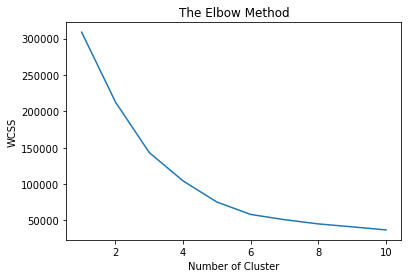

In [26]:
plt.plot( range( 1, 11 ), wcss )
plt.title( 'The Elbow Method' )
plt.xlabel( 'Number of Cluster' )
plt.ylabel( 'WCSS' )
plt.show()

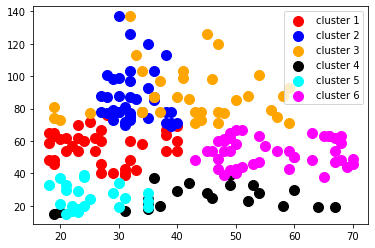

In [27]:
kmeans = KMeans( n_clusters = 6, init = 'k-means++', random_state = 10 )
y = kmeans.fit_predict(X)
plt.scatter( X[y == 0,0 ], X[y == 0,1], s = 100, c = 'red', label = 'cluster 1' )
plt.scatter( X[y == 1,0 ], X[y == 1,1], s = 100, c = 'blue', label = 'cluster 2' )
plt.scatter( X[y == 2,0 ], X[y == 2,1], s = 100, c = 'orange', label = 'cluster 3' )
plt.scatter( X[y == 3,0 ], X[y == 3,1], s = 100, c = 'black', label = 'cluster 4' )
plt.scatter( X[y == 4,0 ], X[y == 4,1], s = 100, c = 'cyan', label = 'cluster 5' )
plt.scatter( X[y == 5,0 ], X[y == 5,1], s = 100, c = 'magenta', label = 'cluster 6' )
plt.legend()

# Hierarichal clustering agglomerative: bottom to top

In [29]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

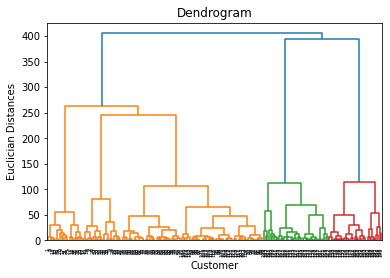

In [30]:
#Using the dendrogram to find the optimal value of the cluster
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram( sch.linkage( X, method = 'ward' ) )
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclician Distances')
plt.show()

!!!**it shoukd be on orange and blue - 5 clusters**!!!

In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering( n_clusters = 5, affinity = 'euclidean', linkage = 'ward' )

In [33]:
y = hc.fit_predict(X)
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

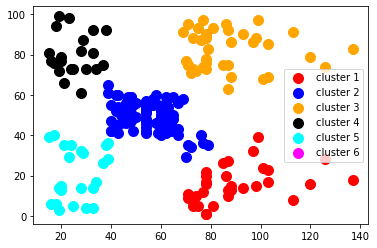

In [34]:
plt.scatter( X[y == 0,0 ], X[y == 0,1], s = 100, c = 'red', label = 'cluster 1' )
plt.scatter( X[y == 1,0 ], X[y == 1,1], s = 100, c = 'blue', label = 'cluster 2' )
plt.scatter( X[y == 2,0 ], X[y == 2,1], s = 100, c = 'orange', label = 'cluster 3' )
plt.scatter( X[y == 3,0 ], X[y == 3,1], s = 100, c = 'black', label = 'cluster 4' )
plt.scatter( X[y == 4,0 ], X[y == 4,1], s = 100, c = 'cyan', label = 'cluster 5' )
plt.scatter( X[y == 5,0 ], X[y == 5,1], s = 100, c = 'magenta', label = 'cluster 6' )
plt.legend()

# 
# 
# 
# Matplotlib

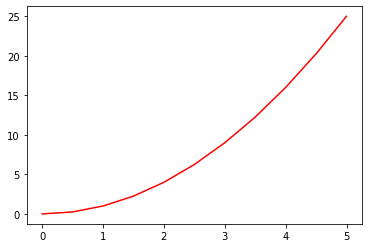

In [35]:
import numpy as np

x = np.linspace( 0, 5, 11 )
y = x ** 2

plt.plot( x, y, 'r' )

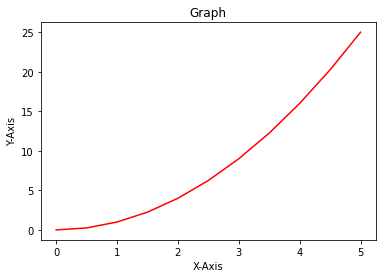

In [36]:
plt.plot( x, y, 'r')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Graph')
plt.show()

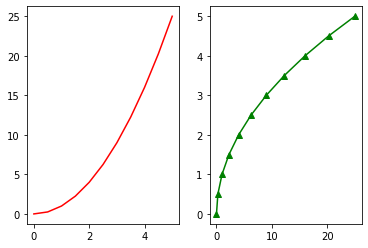

In [37]:
plt.subplot( 1, 2, 1 )
plt.plot( x, y, 'r' )
plt.subplot( 1, 2, 2 )
plt.plot( y, x, 'g^-')

Text(0.5, 1.0, 'Set Title')

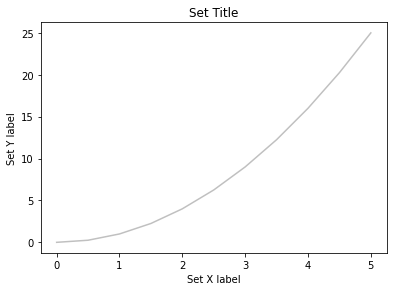

In [42]:
fig = plt.figure()
axes = fig.add_axes( [ 0.1, 0.1, 0.8, 0.8 ] )

axes.plot( x, y, 'silver' )
axes.set_xlabel('Set X label')
axes.set_ylabel('Set Y label')
axes.set_title('Set Title')

Text(0.5, 1.0, 'Axes 2 Title')

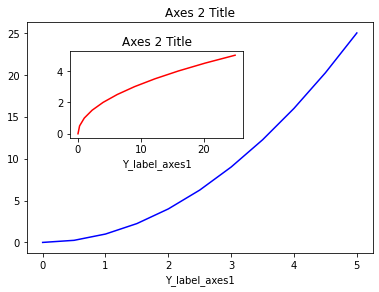

In [47]:
fig = plt.figure()
axe1 = fig.add_axes( [ 0.1, 0.1, 0.8, 0.8 ] )
axe2 = fig.add_axes( [ 0.2, 0.5, 0.4, 0.3 ] )

axe1.plot( x, y, 'b' )
axe1.set_xlabel( 'X_label_axes1' )
axe1.set_xlabel( 'Y_label_axes1' )
axe1.set_title( 'Axes 2 Title' )

axe2.plot( y, x, 'r' )
axe2.set_xlabel( 'X_label_axes1' )
axe2.set_xlabel( 'Y_label_axes1' )
axe2.set_title( 'Axes 2 Title' )



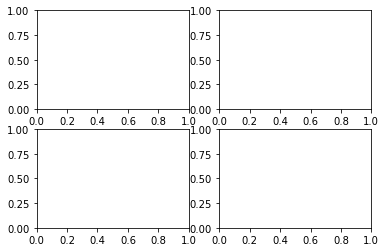

In [56]:
fig, axes = plt.subplots( nrows = 2, ncols = 2 )

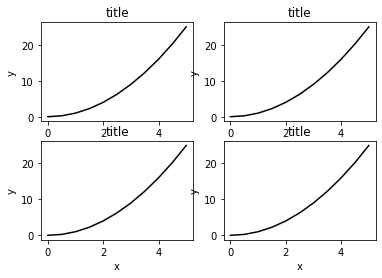

In [68]:
fig, axes = plt.subplots( 2, 2 )
for ax in axes.reshape(-1):
    ax.plot( x, y, 'k' )
    ax.set_xlabel( 'x' )
    ax.set_ylabel( 'y' )
    ax.set_title( 'title' )

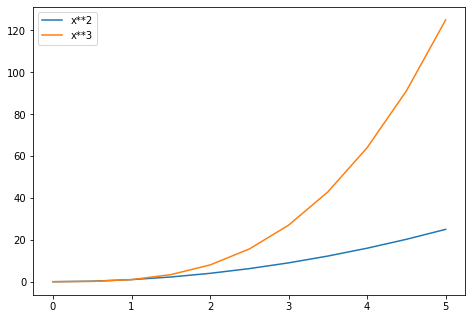

In [63]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot( x, x**2, label = 'x**2')
ax.plot(x, x**3, label = 'x**3' )
ax.legend( loc = 2 ) # 1 - upper right; 2 - upper left, 3 - lower left, 4 - lower right

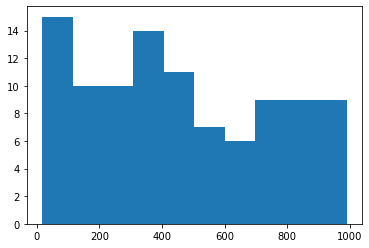

In [71]:
from random import sample
data = sample( range( 1, 1000 ), 100 )
plt.hist( data )
plt.show()

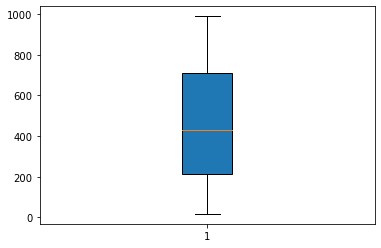

In [73]:
plt.boxplot( data, vert = True, patch_artist = True )
plt.show()

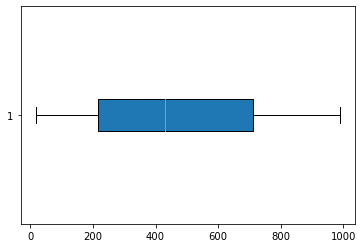

In [74]:
plt.boxplot( data, vert = False, patch_artist = True )
plt.show()

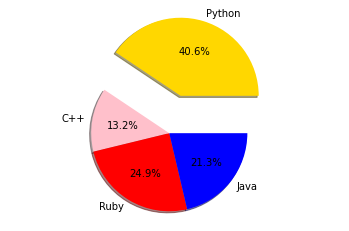

In [84]:
labels = 'Python', 'C++', 'Ruby', 'Java' 
sizes = [ 400, 130, 245, 210 ]
colors = [ 'gold', 'pink', 'red', 'blue' ]
explode = ( 0.5, 0, 0, 0 ) #czyli to jak bardzo oddzielone jest główne
plt.pie( sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.show()

# 
# 
# 
# SQL

In [85]:
import sqlite3

In [86]:
connection = sqlite3.connect('store_transactions.db')
cursor = connection.cursor()